In [1]:
import pandas as pd
import numpy as np
import censusdata

from sklearn.model_selection import train_test_split
import seaborn as sns

## Exploring ACS Data 

This notebook is an initial exploration of ACS data accessed through the Python library CensusData which is built on the Census API.

In [44]:
##search for specific variable name based on indicator to grab later
##indicators available at https://www.census.gov/programs-surveys/acs/guidance/subjects.html

#uncomment to view
#censusdata.censustable('acs5', 2015, 'B15003')

### ETL

In [45]:
def metric_by_year_by_county(census_table_code_list, year, acs):
    data = censusdata.download(acs, year, censusdata.censusgeo([('state', '*'), ('county', '*')]),
          census_table_code_list).reset_index()
    data['state'] = data['index'].apply(lambda x: str(x).split(',')[1].split(':')[0].strip())
    data['county'] = data['index'].apply(lambda x: str(x).split('County')[0].strip())
    data['fips'] = data['index'].apply(lambda x: int(str(x).split(':')[-2][:2].strip() + str(x).split(':')[-1].strip()))
    data.drop('index', axis=1, inplace=True)
    return data

In [46]:
def df_creation():
    df = pd.DataFrame()

    for i in range(2015, 2020, 1):
        metric_df = metric_by_year_by_county(['B25002_002E', 'B25002_003E', 'B25031_003E', 'B08303_001E',
                             'B25031_004E', 'B25031_005E', 'B25031_006E', 'B25077_001E', 'B01003_001E',
                             'B13016_003E', 'B13016_004E', 'B08201_001E', 'B19001_001E',
                             'B13016_005E', 'B13016_006E', 'B13016_007E', 'B13016_008E', 'B13016_009E',
                             'B13016_011E', 'B13016_012E', 'B13016_013E', 'B13016_014E', 'B15003_001E',
                             'B13016_015E', 'B13016_016E', 'B13016_017E', 'B15003_025E',
                             'B15003_022E', 'B15003_023E', 'B15003_024E'], i, 'acs1')
            
        metric_df['year'] = i
        df = df.append(metric_df)
    return df            

In [47]:
#dictionary to maps codes to indicator names

indicator_dict = {'B01003_001E': 'population', 'B08303_001E': 'travel_time_to_work', 
                  'B08201_001E': 'vehicles_available', 'B19001_001E': 'household_income',
                 'B25077_001E': 'home_value_median', 'B15003_022E': 'bachelor_degree',
                 'B25002_002E': 'occupied_units', 'B25002_003E': 'vacant_units',
                 'B25031_003E': 'rent_1bed_median', 'B15003_023E': 'master_degree',
                 'B25031_004E': 'rent_2bed_median', 'B25031_005E': 'rent_3bed_median',
                 'B25031_006E': 'rent_4bed_median', 'B15003_024E': 'professional_degree',
                 'B13016_003E': 'birth_15_19', 'B15003_025E': 'doctorate_degree',
                 'B13016_004E': 'birth_20_24', 'B13016_005E': 'birth_25_29', 'B13016_006E': 'birth_30_34',
                 'B13016_007E': 'birth_35_39', 'B13016_008E': 'birth_40_44', 'B13016_009E': 'birth_45_50',
                 'B13016_011E': 'nobirth_15_19', 'B13016_012E': 'nobirth_20_24', 'B13016_013E': 'nobirth_25_29',
                 'B13016_014E': 'nobirth_30_34', 'B13016_015E': 'nobirth_35_39', 'B13016_016E': 'nobirth_40_44',
                 'B13016_017E': 'nobirth_45_50'}

In [48]:
df = df_creation()

df.rename(columns=indicator_dict,
          inplace=True)
df.replace(-666666666, np.nan, inplace=True)

In [49]:
for col in df.columns:
    print(col+':', df[col].isnull().sum(), 'null values')

occupied_units: 0 null values
vacant_units: 0 null values
rent_1bed_median: 17 null values
travel_time_to_work: 0 null values
rent_2bed_median: 1 null values
rent_3bed_median: 0 null values
rent_4bed_median: 131 null values
home_value_median: 0 null values
population: 0 null values
birth_15_19: 10 null values
birth_20_24: 10 null values
vehicles_available: 0 null values
household_income: 0 null values
birth_25_29: 10 null values
birth_30_34: 10 null values
birth_35_39: 10 null values
birth_40_44: 10 null values
birth_45_50: 10 null values
nobirth_15_19: 10 null values
nobirth_20_24: 10 null values
nobirth_25_29: 10 null values
nobirth_30_34: 10 null values
B15003_001E: 25 null values
nobirth_35_39: 10 null values
nobirth_40_44: 10 null values
nobirth_45_50: 10 null values
doctorate_degree: 25 null values
bachelor_degree: 25 null values
master_degree: 25 null values
professional_degree: 25 null values
state: 0 null values
county: 0 null values
fips: 0 null values
year: 0 null values


In [50]:
df['year'].unique()

array([2015, 2016, 2017, 2018, 2019])

In [51]:
#fill nulls and create ratios

for col in df.columns:
    try:
        mean = df[col].mean()
        df[col].fillna(value=mean, inplace=True)
    except:
        continue

df['birth_ratio_15_19'] = df['birth_15_19']/df['nobirth_15_19']
df['birth_ratio_20_24'] = df['birth_20_24']/df['nobirth_20_24']
df['birth_ratio_25_29'] = df['birth_25_29']/df['nobirth_25_29']
df['birth_ratio_30_34'] = df['birth_30_34']/df['nobirth_30_34']
df['birth_ratio_35_39'] = df['birth_35_39']/df['nobirth_35_39']
df['birth_ratio_40_44'] = df['birth_40_44']/df['nobirth_40_44']
df['birth_ratio_45_50'] = df['birth_45_50']/df['nobirth_45_50']

df['bachelor_ratio'] = df['bachelor_degree']/df['population']
df['master_ratio'] = df['master_degree']/df['population']
df['professional_ratio'] = df['professional_degree']/df['population']
df['doctorate_ratio'] = df['doctorate_degree']/df['population']

df['occupied_ratio'] = df['occupied_units']/(df['occupied_units'] + df['vacant_units'])


In [69]:
df.shape

(4116, 47)

In [52]:
#bring in HPI data

hpi_df = pd.read_excel('HPI_AT_BDL_county (1).xlsx', header=6)

In [55]:
hpi_df.head()

,State,County,FIPS code,Year,Annual Change (%),HPI,HPI with 1990 base,HPI with 2000 base
0,AL,Autauga,1001,1986,.,100.00,95.33,70.56
1,AL,Autauga,1001,1987,-2.53,97.47,92.92,68.77
2,AL,Autauga,1001,1988,3.73,101.10,96.38,71.33
3,AL,Autauga,1001,1989,4.29,105.43,100.51,74.39
4,AL,Autauga,1001,1990,-0.51,104.90,100.00,74.01


In [56]:
hpi_df = hpi_df[hpi_df['Year']>2015]

hpi_df = hpi_df[['Year', 'FIPS code', 'Annual Change (%)']]

hpi_df.columns = ['year', 'fips', 'hpi_change_in_a_year']

In [57]:
#reduce year by 1 so that the hpi annual change value is for one year in the future
hpi_df['year'] = hpi_df['year'].apply(lambda x: x-1)

In [58]:
#merge with indicators and remove nan (not allowed in model)
df = df.merge(hpi_df, how='left', on=['year', 'fips'])

df.replace('.', np.nan, inplace=True)
df['hpi_change_in_a_year'] = df['hpi_change_in_a_year'].astype(float)


df = df.dropna()

## Modeling

In [59]:
# train test split
# try using historical population for population change
X = df[['rent_1bed_median',
       'travel_time_to_work', 'rent_2bed_median', 'rent_3bed_median',
       'rent_4bed_median', 'home_value_median', 'population', 'birth_15_19',
       'birth_20_24', 'vehicles_available', 'household_income', 'birth_ratio_15_19', 
        'birth_ratio_20_24', 'birth_ratio_25_29',
       'birth_ratio_30_34', 'birth_ratio_35_39', 'birth_ratio_40_44',
       'birth_ratio_45_50', 'bachelor_ratio', 'master_ratio',
       'professional_ratio', 'doctorate_ratio', 'occupied_ratio']]
y = df['hpi_change_in_a_year']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(max_depth=10, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=0)

In [62]:
regr.score(X_test, y_test)

0.223366098507933

In [63]:
regr.feature_importances_

array([0.04164774, 0.03304436, 0.06239778, 0.07285233, 0.0491227 ,
       0.11754766, 0.04377559, 0.01773721, 0.04223273, 0.01699454,
       0.01693062, 0.01853495, 0.04270111, 0.03050104, 0.03520986,
       0.03225458, 0.02364214, 0.02172655, 0.05064956, 0.07144385,
       0.03923852, 0.03692786, 0.08288673])

<AxesSubplot:>

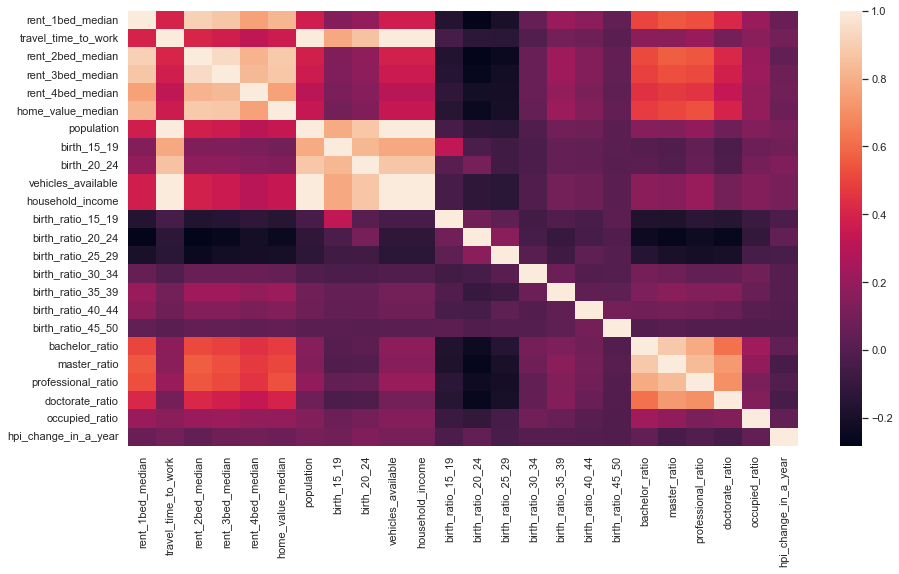

In [66]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df[['rent_1bed_median',
       'travel_time_to_work', 'rent_2bed_median', 'rent_3bed_median',
       'rent_4bed_median', 'home_value_median', 'population', 'birth_15_19',
       'birth_20_24', 'vehicles_available', 'household_income', 'birth_ratio_15_19', 
        'birth_ratio_20_24', 'birth_ratio_25_29',
       'birth_ratio_30_34', 'birth_ratio_35_39', 'birth_ratio_40_44',
       'birth_ratio_45_50', 'bachelor_ratio', 'master_ratio',
       'professional_ratio', 'doctorate_ratio', 'occupied_ratio', 'hpi_change_in_a_year']].corr())